In [38]:
from qiskit import *
from qiskit_textbook.tools import random_state
from qiskit.extensions import Initialize
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram

## Teleporting an <b> Equal superposition </b>

In [61]:
qc = QuantumCircuit(3,3)
%matplotlib inline

## Step 1
- Applying the <b> H</b> gate on the first qubit

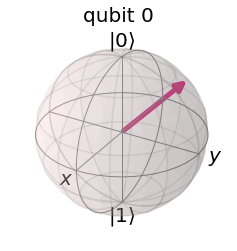

In [62]:
state = random_state(1)
initialsed_gate= Initialize(state)
plot_bloch_multivector(state)

In [72]:
print(state)
print("Probability for being in |0> state :")
print((state[0]*state[0].conjugate()).real * 100)
print("Probability for being in |1> state :")
print((state[1]*state[1].conjugate()).real * 100)

[-0.68725688-0.57035318j  0.44896957-0.02831167j]
Probability for being in |0> state :
79.76247707863
Probability for being in |1> state :
20.237522921370026


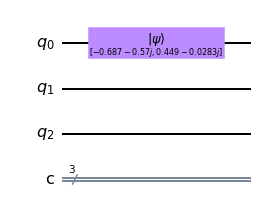

In [64]:
qc.append(initialsed_gate,[0])
qc.draw(output='mpl')

## Step 2
- Create an entanglement between 1 and 2

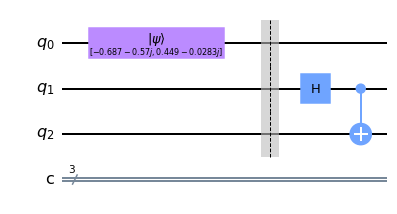

In [65]:
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.draw(output='mpl')

## Step 3
- Controlled X from 0 to 1 and hadamard on 0

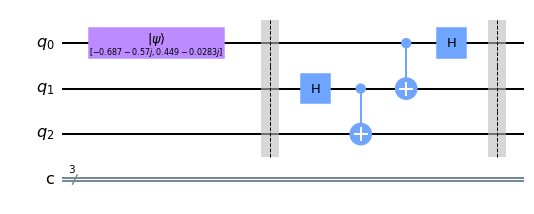

In [66]:
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.draw(output='mpl')

## Step 4
- Measure 0 and them measure 1

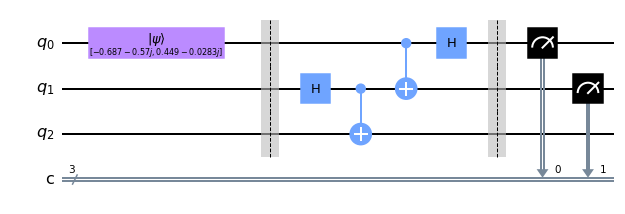

In [67]:
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

## Step 5
- Controlled x from 1 to 2 
- Controlled z from 0 to 2
and we're done!

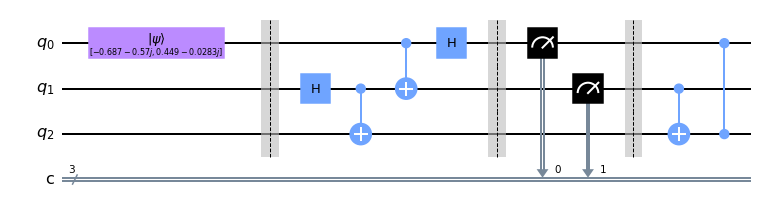

In [68]:
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)
qc.draw(output='mpl')

## Final step 
- Measure Q2
- What you should expect to see is equal probabilities of Q2 being a 0 or 1.
- Let's see

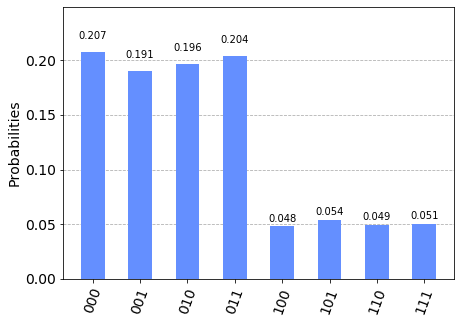

In [69]:
qc.measure([2],[2])
simulator = Aer.get_backend(name = 'qasm_simulator')
result = execute(qc,backend=simulator,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)

## Counting 
- Let's try to get the total shots when the Q2 was 1 and when it was 0

In [70]:
print(counts)

{'000': 2071, '001': 1905, '010': 1964, '011': 2042, '100': 480, '101': 537, '110': 494, '111': 507}


In [71]:
zeroes,ones = 0,0
for i,j in counts.items():
    if(i[0]=='0'):
        zeroes+= j 
    else:
        ones+= j
print("Ones :",ones,'Zeroes :',zeroes)
# dividing by 100 as 10000 shots were there in total 100 * (zeroes)/(total) 
print("Probability of Q2 being 1 :",ones/100,'\nProbability of Q2 being 0 :',zeroes/100)

Ones : 2018 Zeroes : 7982
Probability of Q2 being 1 : 20.18 
Probability of Q2 being 0 : 79.82


## Yes, we have transferred the information from Q0 to Q2!!!
- We can clearly see that the probabilities align with our random state perfectly!!!!
- Let us see what are the counts of Q0 

In [74]:
zeroes,ones = 0,0
for i,j in counts.items():
    if(i[2]=='0'):
        zeroes+= j 
    else:
        ones+= j
print("Ones :",ones,'Zeroes :',zeroes)
# dividing by 100 as 10000 shots were there in total 100 * (zeroes)/(total) 
print("Probability of Q0 being 1 :",ones/100,'\nProbability of Q0 being 0 :',zeroes/100)

Ones : 4991 Zeroes : 5009
Probability of Q0 being 1 : 49.91 
Probability of Q0 being 0 : 50.09


## Here we also see that we have destroyed the superposition of Q0 :D